$h(x)=W^T*x+b$

$s(x)=\frac{1}{(1+e^{-h(x)})}$

$Error=-\frac{1}{m}[\sum_{i=0}^m(y_i*log(s(x_i)+(1-y_i)*log(1-s(x_i)))]$

In [1]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,Y = sklearn.datasets.make_moons(n_samples=500, noise=.2)

In [3]:
X.shape, Y.shape

((500, 2), (500,))

In [4]:
X,Y = X.T,Y.reshape(1,Y.shape[0])

In [5]:
X.shape, Y.shape

((2, 500), (1, 500))

In [6]:
def s(x):
    return 1/(1+np.exp(-x))

In [7]:
def h(x,w,b):
    return np.dot(w.T,X)+b

In [8]:
def Error(p,y,m):
    return -(1/m)*np.sum(np.multiply(np.log(p),y)+np.multiply((1-y),np.log(1-p)))

In [9]:
def derivadas(x,dz,m):
    dw = (1/m)*np.dot(x,dz.T)
    db = (1/m)*np.sum(dz)
    return dw, db

In [10]:
epochs = 1000
alpha = 0.01
m=Y.shape[1]
Errortrack=[]
w=np.random.rand(X.shape[0],1)
b=0

In [11]:
for epoch in range(epochs):
    z = h(X,w,b)
    p = s(z)
    costo = Error(p,Y,m)
    Errortrack.append(np.squeeze(costo))
    dz = p-Y
    dw, db = derivadas(X,dz,m)
    w = w - alpha*dw
    b = b - alpha*db    

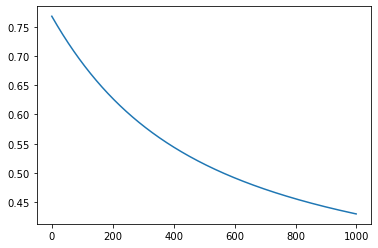

In [12]:
plt.plot(Errortrack);

In [13]:
w

array([[ 1.25111048],
       [-0.7222308 ]])

In [14]:
b

-0.4365390047071242

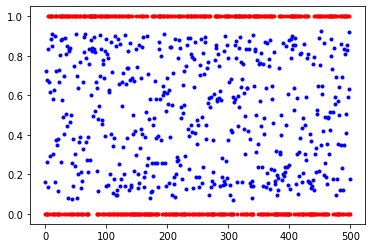

In [15]:
plt.plot(p.T,'.',color='b')
plt.plot(Y.T,'.',color='r');

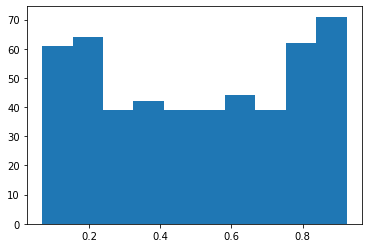

In [16]:
plt.hist(p.T);

In [17]:
type(p)

numpy.ndarray

In [18]:
p.shape

(1, 500)

In [19]:
np.where(p>0.5,1,0)

array([[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 

In [20]:
realyestimado = np.hstack([Y.T,np.where(p>0.5,1,0).T])

In [21]:
def tabulate_array(x, columns):
    idx, counts = np.unique(x[:,columns],return_counts=True, axis=0)
    return [list(idx[i])+[str(counts[i])] for i in range(len(counts))]

In [22]:
tabular = tabulate_array(realyestimado,[0,1])

In [23]:
np.array(tabular).shape

(4, 3)

In [24]:
np.array(tabular)

array([['0', '0', '191'],
       ['0', '1', '59'],
       ['1', '0', '56'],
       ['1', '1', '194']], dtype='<U21')

In [25]:
N = realyestimado.shape[0]
accuracy = (realyestimado[:,0] == realyestimado[:,1]).sum() / N
TP = ((realyestimado[:,1] == 1) & (realyestimado[:,0] == 1)).sum()
FP = ((realyestimado[:,1] == 1) & (realyestimado[:,0] == 0)).sum()
precision = TP / (TP+FP)

In [26]:
accuracy, precision

(0.77, 0.766798418972332)